In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.stats import norm

In [2]:
%config InlineBackend.figure_format = 'svg'

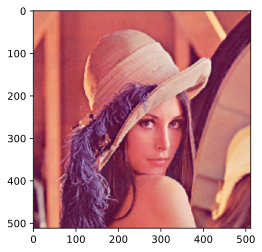

In [3]:
img = imread("lena512color.tiff")
plt.imshow(np.uint8(img))
plt.show()

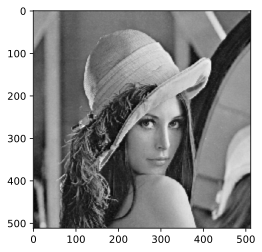

In [4]:
# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
grayscale = np.uint8(img.dot([1./3, 1./3, 1./3]))
plt.imshow(grayscale, cmap=plt.get_cmap('gray'))  # cmap은 color map, 즉 데이터 값과 실제 색깔의 mapping을 지정해 준다. 
                                                  # https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

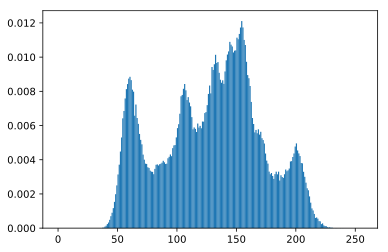

In [5]:
flat = grayscale.flatten()  # 3d array를 1d array로 flat해 준다.

plt.hist(flat, bins=256, range=[0, 256], normed=True)
plt.show()

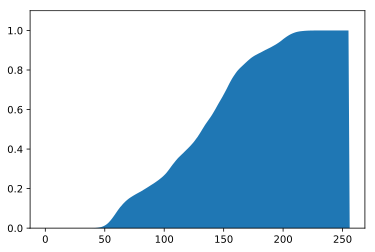

In [6]:
hist, bin_edges = np.histogram(flat, bins=256, range=[0, 256], density=True)
cumsum = np.cumsum(hist)
cumsum = np.append(cumsum, 0)

plt.fill(bin_edges, cumsum)
plt.ylim(0, 1.1)
plt.show()

In [7]:
def cdf(x):
    for index, i in enumerate(cumsum):
        if x <= i:
            return index
    return 0

def clt():
    return np.vectorize(cdf)(np.random.sample(10)).mean()

In [8]:
clt_values = np.array([clt() for _ in range(20000)])

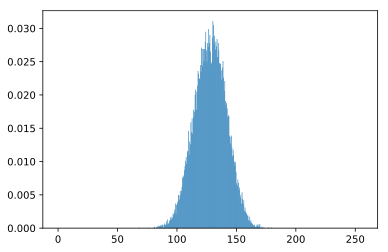

In [9]:
plt.hist(clt_values, bins=512, range=[0, 256], normed=True)
plt.show()

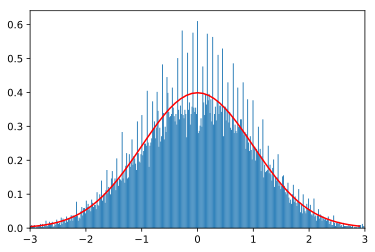

In [10]:
clt_mean = clt_values.mean()
clt_var = clt_values.var()
clt_Z = (clt_values - clt_mean) / (clt_var ** 0.5)

plt.hist(clt_Z, bins=512, normed=True)
plt.plot(np.arange(-3, 3, 0.1), norm.pdf(np.arange(-3, 3, 0.1), 0, 1), 'r')
plt.xlim(-3, 3)
plt.show()